# Machine Learning

Machine learning is increasingly in the news and pervades every aspect of our lives.

Last week [AlphaGo](https://en.wikipedia.org/wiki/AlphaGo) beat Lee Sedol, a Go world champion. Go had been thought to be beyond the capabilities of machines due to its complexity.

Despite the attention machine learning now receives examples of its use are now so common we can often overlook them. Machine learning protects our inboxes from spam messages, recommends purchases on shopping sites, and deciphers our handwriting to efficiently route our mail.

What is machine learning?

> Teaching machines how to learn to carry out tasks by themselves.

Machine learning algorithms do not rely on static instructions provided by human programmers. Instead, they use examples to develop a model from which they can makes predictions or decisions. 

Machine learning is now used in many fields and for many tasks:
- Detecting spam emails
- Recommending products based on past purchases
- Recognizing handwritten text
- Image segmentation and object recognition
- Self-diriving cars
- Speech recognition
- and on ...

Machine learning algorithms can be categorized in several different ways.

We will discuss many of these today and explore the most commonly used in greater detail over the next several weeks.

## Type of task

- In __classification__ the algorithm must assign inputs to one of two (or more) classes. 
- In __regression__ the algorithm returns a value for each sets of inputs received.
- In __clustering__ the algorithm divides the inputs supplied into two or mor subgroups.
- In __density estimation__ the algorithm construsts an estimate for the population distribution based on a small subset of the whole.
- Finally, __dimensionality reduction__ maps inputs on to a lower dimensional space.

## Batch vs online

In __batch learning__ algorithms all the data is available and can be processed at one time. In __online learning__ algorithms only part of the data is available for inclusion at any one time.

## Supervision

In __supervised learning__ each of the supplied inputs is labeled with the desired output. In __unsupervised learning__ no labels are available and the algorithm must find the underlying structure in the data itself. Somewhere in the middle is __semi-supervised learning__ in which only some of the supplied inputs also have the desired output.

In __reinforcement learning__ the algorithm must interact with an environment to perform a certain goal, without explicit feedback on how well it is performing.

## Classification

Classification is concerned with assigning inputs to different classes or sub-groups.

Examples include predicting survivors/non-survivors, response to a therapy, etc

![Example data](files/classification-data.png)

![Example plot](files/classification.png)

## Regression

Regression is concerned with predicting a continuous output given an input.

Examples include predicting prices, production, demand, etc.

![Regression example](files/regression.png)

## Clustering

Clustering attempts to find structure in the data by grouping similar items together. The items within a group should be more similar to each other than to items in other groups. The approach taken to determine similarity and to assign items to a group can vary depending on the algorithm used.

Choosing the number of groups into which to divide the observations can be challenging. Some algorithms rely on the number of groups being specified, while other algorithms choose the number of groups based on different parameters.

![Otsu](clustering.png)

## Density estimation

In density estimation the goal is to determine the distribution of a population from an observed sample.

The most common example is a histogram. Although simple, histograms are susceptible to misinterpretation with different bin sizes and positions significantly changing their visualization. More robust approaches avoid these issues.

![kernal-density-estimation](files/density-estimation.png)

## Dimensionality reduction

Dimensionality reduction attempts to map a high-dimensional feature set on to a lower dimensional space.

This approach can be used for both feature selection and feature extraction.

Feature selection attempts to pick the subset of variables that best maintain the overall performance of the system.

Feature extraction transforms the data in the high dimensional space into a lower dimensional space. By maximizing the variance in the transformed variables it is hoped that the most important variance in the high dimensional space is maintained.

![Feature selection](files/feature-selection.png)

## Batch learning

In batch, or offline, learning all the data is available at the same time. This is the ideal situation.

## Online learning

The alternative to batch learning is online learning. In this situation we don't have access to all the data. There are a variety of reasons for this. The dataset may simply be too large to process at the same time. Additional data may also be generated as a function of time. Online learning is also important when the properties of the underlying system are changing.

### Statistical learning models

When the system is stable the advantage of online learning is the ability to utilize the maximum amount of data. Some of the algorithms used in batch learning can also be applied for online learning with minimal modification. Ideally, an online algorithm would need only the next training example, the current state of the function and a minimal set of additional information that is independent in size to the total number of observations previously processed. 

Algorithms such as gradient descent are well suited to online learning. Non-linear algorithms may be harder to implement.

### Adversarial models

If the underlying system being modeled is changing a different approach is needed. The system may change for a variety of reasons. For example, if we were predicting mortality in patients the performance of our model would gradually drop as our therapies improve. The system may also be actively changing in an attempt to decrease the model performance. For example, detection of spam email is a constant battle between those create spam messages and those attempting to detect and capture spam emails.

Regardless of the reasons for the system changing the value of recent examples will be more important than examples seen in the past. 

## Supervised learning

In supervised learning a set of labeled training data is available. The task of the algorithm is to find the underlying structure in the data such that for previously unseen inputs a reasonable output can be predicted.

There are a variety of different algorithms each with their particular strengths and weaknesses. 

![Example classification data](files/classification-data.png)

## Unsupervised learning

Unsupervised learning is concerned with finding the hidden structure in unlabeled data. Without labels evaluating the performance of a potential solution can be problematic. The approach taken will depend on the algorithm being used.

## Reinforcement learning

Reinforcement learning focuses on adapting the behaviour of an agent in a particular environment such that the cumulative reward is maximized.

Inputs are not paired with correct outputs leaving the algorithm to estimate the utility of any action based on experience. There is a trade-off between taking an action that has had a positive outcome in the past and trying alternative actions that may have higher rewards.

The important point here is that taking the optimal action can have no reward, and taking an inferior action can have a positive reward. Knowing which is which only becomes clear with multiple trials.

This trade-off is perhaps most widely studied in multi-armed bandit problems.

### Optimizing for page views

As an example, let's suppose we are an online publisher generating revenue from advertising. The more page views we get the more money we make. On each page we will put a list of articles we hope the viewer will like and hopefully click, generating revenue. But how do we choose which articles to show?

This is an ideal situation for using a multi-armed bandit algorithm. As a simple example, we might have 20 articles from which we can choose one.

One approach would be to show each article to a thousand people picked at random, record how many clicks each receive, and then show the article with the highest number to all future visitors.

If after 100 visitors one article has received zero clicks should we persist and show it to a further 900 visitors? Or, are we throwing away advertising revenue? How about after 200, or 300?

This is the explore-exploit trade-off. We can explore the different options at the risk of losing money during our trials or we can exploit actions we know to be good at the risk of missing out on better returns and stagnating.

### Adaptive clinical trials

Parallels can be made with randomized clinical trials. If instead of page views we have patients, instead of clicks we have survival, and instead of articles we have treatments the situation resembles a randomized trial.

Let's consider a trial with two different treatments. At the beginning of the trial we don't know which is best, and at the end, hopefully, we know one is better than the other. In a conventional trial the last patient enrolled still has an equal chance of being assigned to either treatment, even though we now know much more about the relative efficacy of the two treatments.

Adaptive randomization attempts to maximize the benefit of the trial to the participants while maintaining the societal benefit.

There have been a variety of models developed and studied for these trials but we can implement a simple algorithm for these multi-armed bandit problems.

[Coupling adaptive randomization with EHRs](http://jama.jamanetwork.com/article.aspx?articleID=2210902)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
class Model(object):
    def __init__(self, algo, algo_kwargs, weights=[0.1, 0.1], size=100, repeats=200):
        self.algo = algo
        self.algo_kwargs = algo_kwargs
        self.weights = weights
        self.size = size
        self.repeats = repeats
        
    def run_simulation(self):
        """Run a single simulation, recording the performance"""
        algo = self.algo(**self.algo_kwargs)
        arm_choice_record = []
        reward_record = []
        for i in range(self.size):
            arm = algo.choose_arm()
            arm_choice_record.append(arm)
            reward = np.random.random() < self.weights[arm]
            reward_record.append(reward)
            algo.update(arm, reward)
        return arm_choice_record, reward_record
    
    def repeat_simulation(self):
        """Run multiple simulations, recording the performance of each"""
        arm_choice = []
        reward = []
        for i in range(self.repeats):
            arm_choice_record, reward_record = self.run_simulation()
            arm_choice.append(arm_choice_record)
            reward.append(reward_record)
        self.arm_choice = np.array(arm_choice)
        self.reward = np.array(reward)
        
    def plot_arm_frequency(self, ax):
        """Plot the frequency with which the second arm is chosen
        NOTE: Currently only works for two arms"""
        ax.plot(self.arm_choice.mean(axis=0), 'k.')
        ax.set_title('Frequency of arm choice')
        ax.set_xlabel('Trial')
        ax.set_ylabel('Frequency')
        return ax
    
    def plot_reward(self, ax):
        """Plot the average reward for each trial across all simulations"""
        ax.plot(self.reward.mean(axis=0), 'k.')
        ax.set_title('Reward')
        ax.set_xlabel('Trial')
        ax.set_ylabel('Reward')
        return ax
    
    def plot_cumulative_reward(self, ax):
        """Plot the cumulative reward across all simulations"""
        ax.plot(np.cumsum(self.reward, axis=1).mean(axis=0), 'k.')
        ax.set_title('Cumulative Reward')
        ax.set_xlabel('Trial')
        ax.set_ylabel('Cumulative Reward')
        return ax

In [3]:
class RCT(object):
    def __init__(self, n_arms, epsilon):
        self._epsilon = epsilon
        self.counts = [0] * n_arms
        self.values = [0] * n_arms
        self.n_arms = n_arms
    
    def choose_arm(self):
        """Choose an arm"""
        if np.random.random() > self.epsilon:
            weights = np.array(self.values)
            weights = weights == weights.max()
            weights = weights / weights.sum()
            return np.random.choice(np.arange(self.n_arms), p=weights)
        else:
            return np.random.randint(self.n_arms)
        
    
    def update(self, arm, reward):
        """Update an arm with the reward"""
        self.counts[arm] = self.counts[arm] + 1
        n = self.counts[arm]
        value = self.values[arm]
        # Running product
        self.values[arm] = ((n - 1) / n) * self.values[arm] + (1/n) * reward
    
    @property
    def epsilon(self):
        if sum(self.counts) < 100:
            return 1
        else:
            return 0

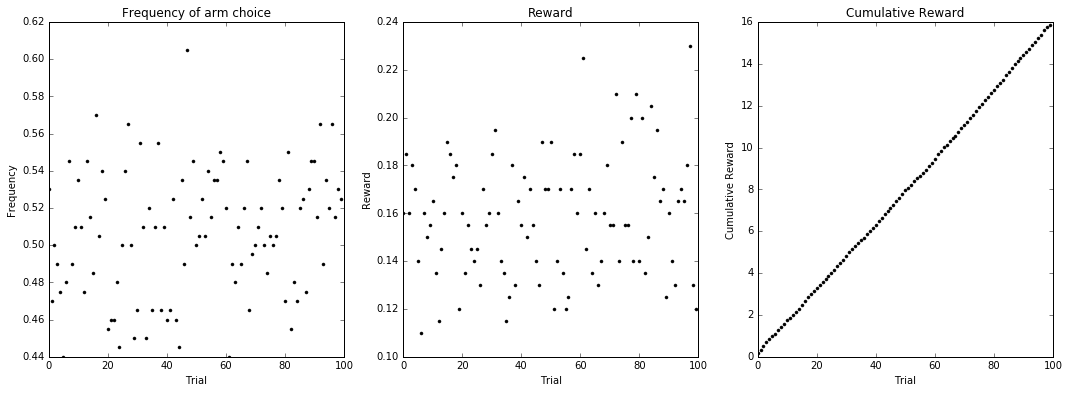

In [4]:
model = Model(RCT, {'n_arms': 2, 'epsilon':0.05}, weights=[0.1, 0.2])
model.repeat_simulation()

fig, axes = plt.subplots(1,3, figsize=(18,6))
model.plot_arm_frequency(ax=axes[0])
model.plot_reward(ax=axes[1])
model.plot_cumulative_reward(ax=axes[2])

plt.show()

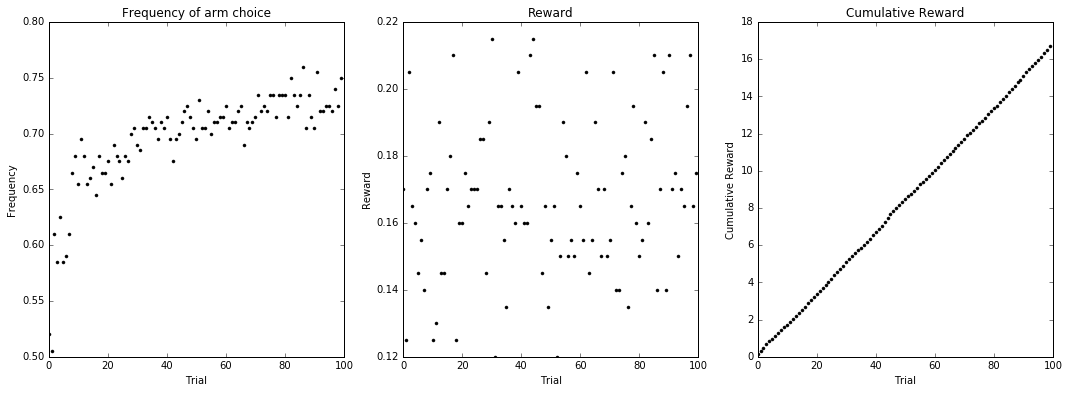

In [5]:
class EpsilonGreedy(RCT):
    
    @property
    def epsilon(self):
        return self._epsilon

model = Model(EpsilonGreedy, {'n_arms': 2, 'epsilon':0.05}, weights=[0.1, 0.2])
model.repeat_simulation()

fig, axes = plt.subplots(1,3, figsize=(18,6))
model.plot_arm_frequency(ax=axes[0])
model.plot_reward(ax=axes[1])
model.plot_cumulative_reward(ax=axes[2])

plt.show()

# Machine learning beyond the algorithms

Much of our time working on machine learning algorithms is actually spent on relatively mundane tasks:

- Reading and cleaning the data
- Understanding the structure of the data and changing it to be suitable for use with our tools.
- Applying our machine learning approach of choice __(perhaps 10% of our time)__
- Measuring performance

We will be spending much of our time with tools we are already familiar with. Python itself, numpy, scipy, pandas, and matplotlib will all likely be relied upon.

# Final Projects

The final part of the course is the project. These should be relatively substantial but do not need to include everything we have covered during the course. If it doesn't make sense to include a particular concept then don't try to force it in to a project.

The project can be relevant to your work, useful in your personal life, or purely educational. 

If you choose a project relevant to your work please be sure you are not exposing any confidential information, including PII, PHI, or intellectual property. For PII and PHI issues can be avoided using fictitious example data.

If you are struggling to find an idea consider looking at [kaggle](http://kaggle.com), this is a competition site that aims to find better solutions to problems using machine learning. Anyone can compete and these challenges would fall within the educational category.

The first step in working on a project is deciding what to do. Ideally the project would neither be too difficult not too easy. So that I can provide feedback send in your idea and we can make sure it is suitable.

# Assignments

1. Send in a rough outline of your project idea. This is __not graded__, I will ask for a more complete description later for inclusion in grading.
2. Plot the performance of the RCT and EpsilonGreedy algorithms on the same plots so that they can more easily be compared.
3. Investigate how changing the value of epsilon changes the performance of the EpsilonGreedy algorithm. Reuse your approach from assignment #2 to plot the performance for different epsilon values.
4. When we have very little information on the relative performance of the two arms a high exploration rate quickly provides us with additional information. However, after several hundred trials we are relatively confident in the performance of each arm and a high exploration rate is detrimental as we will be choosing an arm we know to be inferior at a high rate. A better approach would be to reduce the exploration rate as we acquire more information. This is a very similar approach to the simulated annealing optimizer we looked at in week 2. Create a new class that inherits from EpsilonGreedy and gradually reduces the value of epsilon over time.

## Due for next week

1. Rough outline of project idea
2. Plots showing both EpsilonGreedy and RCT performance
3. Plots showing EpsilonGreedy performance with different epsilon values
4. Class implementing EpsilonGreedy with an adaptive epsilon value.